In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os

import numpy as np
import pandas as pd
import update
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Inspired from stackoverflow.com/questions/25239958
from sklearn.base import BaseEstimator, TransformerMixin
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [8]:
os.getcwd()

'C:\\Users\\haoni\\Desktop\\Projects\\New folder'

In [9]:
path = os.path.join(os.getcwd(), 'data')
path

'C:\\Users\\haoni\\Desktop\\Projects\\New folder\\data'

In [11]:
cust = pd.read_excel(os.path.join(path, 'cust_v2.xlsx'))
cust.shape

(42188, 8)

In [12]:
contact = pd.read_csv(os.path.join(path, 'contact_v2.csv'))
contact.shape

(41188, 8)

In [13]:
#join 2 data sets
cmpn = pd.merge(left=contact, right=cust, how='inner', on='cust_id')
cmpn.shape

(41188, 15)

In [ ]:
#change column order
col = ['cust_id','age','job','marital','education','default','mortgage','loan',
       'contact_type','date','duration','contact_num','p_days','p_outcome','y']
cmpn = cmpn[col]

In [ ]:
cmpn = update.update(df=cmpn) 
# # run update function in update module(package) to add noise to the dataset

In [15]:
cmpn['duration_mins'] = cmpn.duration / 60
cmpn.shape

(41188, 16)

In [23]:
# Distribution of numerical columns
cmpn.describe().astype(int)

,cust_id,duration,contact_num,p_days,age,duration_mins
count,41188,41188,41188,41188,41188,41188
mean,49882,258,2,962,40,4
std,28870,259,2,186,10,4
min,2,0,1,0,17,0
25%,24897,102,1,999,32,1
50%,49676,180,2,999,38,3
75%,74895,319,3,999,47,5
max,99999,4918,56,999,98,81


In [24]:
# Distribution of categorical variables
cmpn.job.value_counts(dropna=False)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [16]:
cmpn.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [17]:
cmpn.pivot_table(values='duration', index='job', columns='y', aggfunc=np.mean, margins=True)

y,no,yes,All
job,,,
admin.,215.093385,517.414201,254.312128
blue-collar,229.878018,732.673981,264.542360
entrepreneur,225.632883,667.540323,263.267857
housemaid,218.778826,535.537736,250.454717
management,220.828197,543.804878,257.058140
retired,224.263608,420.235023,273.712209
self-employed,222.220912,622.020134,264.142153
services,225.047998,634.851393,258.398085
student,228.851667,403.316364,283.683429


In [19]:
cmpn['date1'] = pd.to_datetime(cmpn.date)
cmpn.dtypes

cust_id                   int64
contact_type             object
duration                  int64
contact_num               int64
p_days                    int64
p_outcome                object
y                        object
date                     object
age                       int64
job                      object
marital                  object
education                object
default                  object
mortgage                 object
loan                     object
duration_mins           float64
date1            datetime64[ns]
dtype: object

In [20]:
# Create year-month (yyyymm format) string column
cmpn.date1.dt.month
cmpn['yrmth'] = cmpn.date1.dt.strftime('%Y%m')

In [21]:
# drop original date and rename date1 as date
cmpn = cmpn.drop(['date'], axis=1)
cmpn.shape

(41188, 17)

In [22]:
cmpn = cmpn.rename(columns={'date1':'date'})

In [28]:
cmpn = pd.read_pickle('./data/cmpn.pkl')
cmpn.shape

(41189, 17)

In [29]:
# Drop duplicated records
cmpn = cmpn.drop_duplicates()

In [30]:
# show data summary in a print format
cmpn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cust_id        41188 non-null  int64         
 1   age            40688 non-null  float64       
 2   job            41188 non-null  object        
 3   marital        41188 non-null  object        
 4   education      39457 non-null  object        
 5   default        41188 non-null  object        
 6   mortgage       41188 non-null  object        
 7   loan           41188 non-null  object        
 8   contact_type   41188 non-null  object        
 9   duration       41188 non-null  int64         
 10  contact_num    41188 non-null  int64         
 11  p_days         41188 non-null  int64         
 12  p_outcome      41188 non-null  object        
 13  y              41088 non-null  object        
 14  duration_mins  41188 non-null  float64       
 15  date           4118

In [31]:
# Check missing for every element, return True if missing 
cmpn.isnull().head()

,cust_id,age,job,marital,education,default,mortgage,loan,contact_type,duration,contact_num,p_days,p_outcome,y,duration_mins,date,yrmth
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
# Check if the entire dataset has any NA values
cmpn.isnull().any(axis=None)

True

In [33]:
# Check missing for each column
cmpn.isnull().any(axis=0)

cust_id          False
age               True
job              False
marital          False
education         True
default          False
mortgage         False
loan             False
contact_type     False
duration         False
contact_num      False
p_days           False
p_outcome        False
y                 True
duration_mins    False
date             False
yrmth            False
dtype: bool

In [34]:
# Check missing for each observation
cmpn.isnull().any(axis=1).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [35]:
# Check number of missing values for each column
cmpn.isnull().sum(axis=0)

cust_id             0
age               500
job                 0
marital             0
education        1731
default             0
mortgage            0
loan                0
contact_type        0
duration            0
contact_num         0
p_days              0
p_outcome           0
y                 100
duration_mins       0
date                0
yrmth               0
dtype: int64

In [38]:
col_type = cmpn.dtypes
col_type

cust_id                   int64
age                     float64
job                      object
marital                  object
education                object
default                  object
mortgage                 object
loan                     object
contact_type             object
duration                  int64
contact_num               int64
p_days                    int64
p_outcome                object
y                        object
duration_mins           float64
date             datetime64[ns]
yrmth                    object
dtype: object

In [39]:
var_cat = col_type[col_type=='object'].index.tolist()
print(var_cat)

['job', 'marital', 'education', 'default', 'mortgage', 'loan', 'contact_type', 'p_outcome', 'y', 'yrmth']


In [40]:
for i, var in enumerate(var_cat):
    print(str(i) + " - " + str(var) + ":")
    print(cmpn[var].value_counts(dropna=False))
    print('-------------------------------------------------------')
    print()

0 - job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
                   330
Name: job, dtype: int64
-------------------------------------------------------

1 - marital:
married     24928
single      11568
divorced     4612
               80
Name: marital, dtype: int64
-------------------------------------------------------

2 - education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
NaN                     1731
illiterate                18
Name: education, dtype: int64
-------------------------------------------------------

3 - default:
no     32588
        8597
yes        3
Name: default, dtype: int64
--------------------------------------------------

In [42]:
var_key = ['cust_id','date','yrmth']
var_key

['cust_id', 'date', 'yrmth']

200805    7763
200807    6685
200905    5794
200808    5175
200806    4374
200811    3616
200904    2458
200908     770
200906     715
200910     447
200911     357
201007     311
201009     303
200903     282
200909     267
201003     264
201008     233
201006     229
201005     212
201010     204
200907     178
201004     174
200912     172
201011     128
200810      67
200812      10
Name: yrmth, dtype: int64

In [44]:
for var in var_cat:
    cmpn.loc[cmpn[var]=='', var] = np.nan

In [45]:
MissingSummary = pd.concat([cmpn.dtypes, cmpn.isnull().any(axis=0), cmpn.isnull().sum(axis=0)], 
                           axis=1)
MissingSummary.columns = ['FeatureType','IsMissing', 'MissingCnt']
MissingSummary

,FeatureType,IsMissing,MissingCnt
cust_id,int64,False,0
age,float64,True,500
job,object,True,330
marital,object,True,80
education,object,True,1731
default,object,True,8597
mortgage,object,True,990
loan,object,True,990
contact_type,object,False,0
duration,int64,False,0


In [46]:
# Get rid of customer record if the corresponding y is missing.
cmpn.dropna(subset=['y']).shape

(41088, 17)

In [47]:
cmpn = cmpn.dropna(subset=['y'])

In [48]:
# reset index
cmpn = cmpn.reset_index(drop=True)

In [49]:
cmpn.drop('default', axis=1).shape

(41088, 16)

In [51]:
# Get rid of attributes with more than 20% missing value
MissingSummary

,FeatureType,IsMissing,MissingCnt
cust_id,int64,False,0
age,float64,True,500
job,object,True,330
marital,object,True,80
education,object,True,1731
default,object,True,8597
mortgage,object,True,990
loan,object,True,990
contact_type,object,False,0
duration,int64,False,0


In [52]:
DropColumn = MissingSummary[(MissingSummary.MissingCnt/cmpn.shape[0]>0.2)].index.tolist()
DropColumn

['default']

In [53]:
cmpn = cmpn.drop(DropColumn, axis=1)

In [54]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

In [55]:
# Create a SimpleImputer object with strategy = 'median'
imputer = SimpleImputer(strategy="median")
imputer

SimpleImputer(strategy='median')

In [57]:
type(imputer)

sklearn.impute._base.SimpleImputer

In [64]:
# Select the numerical columns only
var_num = col_type[col_type!='object'].index.tolist()
var_num = [item for item in var_num if item not in var_key]
cmpn_num = cmpn[var_num]
mindex = cmpn_num[cmpn_num.age.isna()].head().index
cmpn_num[cmpn_num.age.isna()].head()

,age,duration,contact_num,p_days,duration_mins
44,NaN,165,4,999,2.750000
65,NaN,5,1,999,0.083333
257,NaN,1307,1,999,21.783333
336,NaN,97,2,999,1.616667
547,NaN,59,1,999,0.983333


In [65]:
# impute missing values with column median
X = imputer.fit_transform(cmpn_num)

In [66]:
X

array([[ 52.        , 108.        ,   2.        , 999.        ,
          1.8       ],
       [ 31.        , 422.        ,   5.        , 999.        ,
          7.03333333],
       [ 36.        , 107.        ,  13.        , 999.        ,
          1.78333333],
       ...,
       [ 54.        , 178.        ,   5.        , 999.        ,
          2.96666667],
       [ 37.        , 219.        ,   2.        , 999.        ,
          3.65      ],
       [ 40.        , 534.        ,   1.        , 999.        ,
          8.9       ]])

In [67]:
imputer.statistics_

array([ 38., 180.,   2., 999.,   3.])

In [68]:
# manually calculate the median for each column
cmpn_num.median().values

array([ 38., 180.,   2., 999.,   3.])

In [69]:
# Add back columns name
cmpn_num_df = pd.DataFrame(X, columns=cmpn_num.columns)

In [70]:
# Validate
cmpn_num_df.loc[mindex]

,age,duration,contact_num,p_days,duration_mins
44,38.0,165.0,4.0,999.0,2.750000
65,38.0,5.0,1.0,999.0,0.083333
257,38.0,1307.0,1.0,999.0,21.783333
336,38.0,97.0,2.0,999.0,1.616667
547,38.0,59.0,1.0,999.0,0.983333


In [71]:
var_cat

['job',
 'marital',
 'education',
 'default',
 'mortgage',
 'loan',
 'contact_type',
 'p_outcome',
 'y',
 'yrmth']

In [72]:
# Remove default from var_cat
var_cat = [item for item in var_cat if item not in ['default']]
cmpn_cat = cmpn[var_cat]

In [73]:
# Show some missing records
mindex = cmpn_cat[cmpn_cat.isnull().any(axis='columns')].head().index
cmpn_cat[cmpn_cat.isnull().any(axis='columns')].head()

,job,marital,education,mortgage,loan,contact_type,p_outcome,y,yrmth
13,services,married,high.school,NaN,NaN,cellular,nonexistent,no,200905
17,unemployed,married,NaN,yes,no,telephone,nonexistent,no,200805
34,blue-collar,married,NaN,no,no,cellular,failure,no,200905
62,NaN,married,NaN,no,no,telephone,nonexistent,no,200805
70,student,divorced,NaN,no,no,telephone,nonexistent,no,201009


In [74]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [75]:
# Create MostFrequentImputer object
MI = MostFrequentImputer()

In [76]:
# Calculate the most frequent item for each column
MI.fit(cmpn_cat)

MostFrequentImputer()

In [77]:
# Impute missing value
cmpn_cat_df = MI.transform(cmpn_cat)
cmpn_cat_df.loc[mindex]

,job,marital,education,mortgage,loan,contact_type,p_outcome,y,yrmth
13,services,married,high.school,yes,no,cellular,nonexistent,no,200905
17,unemployed,married,university.degree,yes,no,telephone,nonexistent,no,200805
34,blue-collar,married,university.degree,no,no,cellular,failure,no,200905
62,admin.,married,university.degree,no,no,telephone,nonexistent,no,200805
70,student,divorced,university.degree,no,no,telephone,nonexistent,no,201009


In [78]:
#data concatenation
cmpn = pd.concat([cmpn[var_key],cmpn_num_df,cmpn_cat_df], axis=1)[cmpn.columns]
# Check if the entire dataset has any NA values
cmpn.isnull().any(axis=None)

False

In [79]:
#check if response rate has any seasonality
# Add month column
cmpn['month'] = cmpn.date.dt.month
cmpn.month.value_counts()

5     13733
7      7150
8      6168
6      5307
11     4095
4      2626
10      713
9       570
3       544
12      182
Name: month, dtype: int64

In [80]:
# Number of contact by month and y
res = cmpn.pivot_table(values='cust_id', index='month', columns='y', aggfunc='count', margins=True)
res

y,no,yes,All
month,,,
3,268,276,544
4,2088,538,2626
5,12849,884,13733
6,4748,559,5307
7,6503,647,7150
8,5516,652,6168
9,314,256,570
10,400,313,713
11,3680,415,4095


In [81]:
# Add response rate
res['response_rate'] = res.yes / res.All
res

y,no,yes,All,response_rate
month,,,,
3,268,276,544,0.507353
4,2088,538,2626,0.204874
5,12849,884,13733,0.064370
6,4748,559,5307,0.105333
7,6503,647,7150,0.090490
8,5516,652,6168,0.105707
9,314,256,570,0.449123
10,400,313,713,0.438990
11,3680,415,4095,0.101343


In [82]:
# Remove "all" row and sort by response rate (descending)
res1 = res.iloc[:-1,:].sort_values(by='response_rate', ascending=False)
res1

y,no,yes,All,response_rate
month,,,,
3,268,276,544,0.507353
12,93,89,182,0.489011
9,314,256,570,0.449123
10,400,313,713,0.438990
4,2088,538,2626,0.204874
8,5516,652,6168,0.105707
6,4748,559,5307,0.105333
11,3680,415,4095,0.101343
7,6503,647,7150,0.090490


In [83]:
# Extract "all" row
res2 = res.iloc[-1:,:]
res2

y,no,yes,All,response_rate
month,,,,
All,36459,4629,41088,0.112661


In [84]:
# concatenate res1 and res2
pd.concat([res1,res2], axis=0)

y,no,yes,All,response_rate
month,,,,
3,268,276,544,0.507353
12,93,89,182,0.489011
9,314,256,570,0.449123
10,400,313,713,0.438990
4,2088,538,2626,0.204874
8,5516,652,6168,0.105707
6,4748,559,5307,0.105333
11,3680,415,4095,0.101343
7,6503,647,7150,0.090490


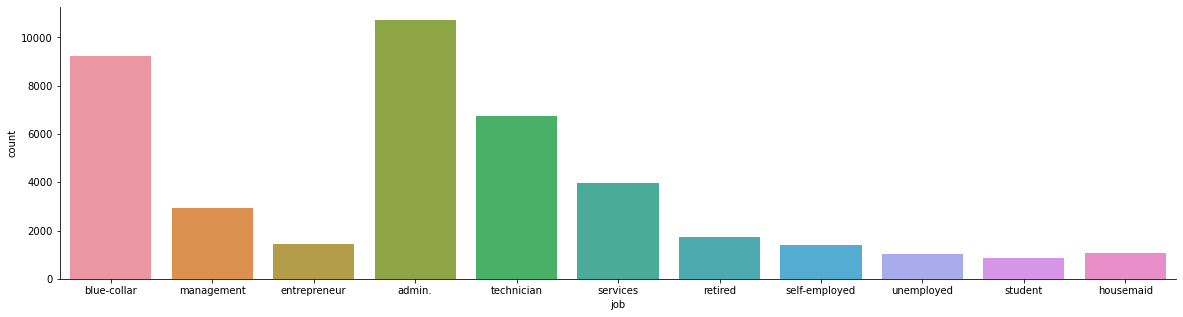

In [85]:
#Visualize
plt.subplots(figsize=(20,5))
sns.countplot(x = 'job', data = cmpn)
sns.despine() # try to see the difference without running sns.despine()

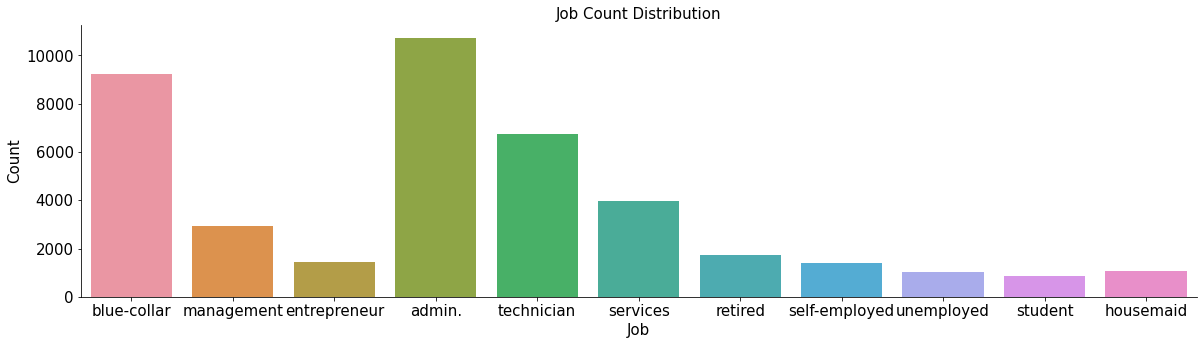

In [86]:
# Add chart title, xlabel and ylabel

fig, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x = 'job', data = cmpn, ax = ax1)
ax1.set_xlabel('Job', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Job Count Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
sns.despine()

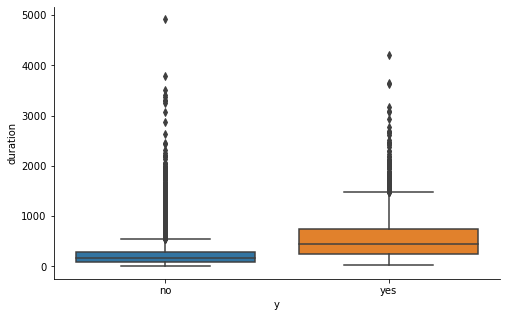

In [87]:
plt.subplots(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=cmpn)
sns.despine()

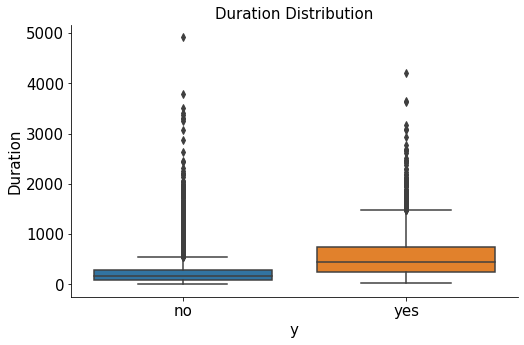

In [88]:
fig, ax1= plt.subplots(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=cmpn, ax=ax1)
ax1.set_xlabel('y', fontsize=15)
ax1.set_ylabel('Duration', fontsize=15)
ax1.set_title('Duration Distribution', fontsize=15)
ax1.tick_params(labelsize=15)
sns.despine()

In [89]:
#Predict who is more likely to respond the campaign
df = cmpn.copy()
# Change the outcome to binary, i.e. 0 and 1
df.loc[df.y=='no','y'] = 0
df.loc[df.y=='yes','y'] = 1
df['y'] = df.y.astype('int64')
df.y.value_counts()

0    36459
1     4629
Name: y, dtype: int64

In [90]:
# response rate by different categorical variables
for var in ['month']+var_cat[:-1]:
    df1 = pd.crosstab(cmpn[var], cmpn.y, margins= True)
    df1.reset_index(inplace = True)
    df1.columns.name = ''
    df1['num_contact'] = df1.no + df1.yes
    df1['response_rate'] = df1.yes / df1.num_contact
    df1 = df1[[var, 'num_contact', 'response_rate']]
    df1.sort_values(by='response_rate', ascending=False, inplace=True)
    print(str(var) + ":")
    print(df1)
    print('-------------------------------------------------------------------------')

month:
   month  num_contact  response_rate
0      3          544       0.507353
9     12          182       0.489011
6      9          570       0.449123
7     10          713       0.438990
1      4         2626       0.204874
10   All        41088       0.112661
5      8         6168       0.105707
3      6         5307       0.105333
8     11         4095       0.101343
4      7         7150       0.090490
2      5        13733       0.064370
-------------------------------------------------------------------------
job:
              job  num_contact  response_rate
8         student          873       0.313860
5         retired         1715       0.253061
10     unemployed         1012       0.142292
0          admin.        10722       0.128987
11            All        41088       0.112661
4      management         2917       0.112444
9      technician         6725       0.108401
6   self-employed         1417       0.105152
3       housemaid         1057       0.100284
2    entre

In [91]:
df.loc[df.month.isin([3,9,10,12]),'seasonality'] = 1
df.loc[~df.month.isin([3,9,10,12]),'seasonality'] = 0
df.loc[:,'seasonality'] = df.seasonality.astype('int64')
print(df.seasonality.value_counts(dropna=False))
print(df.seasonality.dtypes)

0    39079
1     2009
Name: seasonality, dtype: int64
int64


In [92]:
df.loc[df.job=='student','student'] = 1
df.loc[df.job!='student','student'] = 0
df.loc[:,'student'] = df.student.astype('int64')
print(df.student.value_counts(dropna=False))
print(df.student.dtypes)

0    40215
1      873
Name: student, dtype: int64
int64


In [93]:
df.loc[df.job=='retired','retired'] = 1
df.loc[~(df.job=='retired'),'retired'] = 0
df.loc[:,'retired'] = df.retired.astype('int64')
print(df.retired.value_counts(dropna=False))
print(df.retired.dtypes)

0    39373
1     1715
Name: retired, dtype: int64
int64


In [94]:
df.loc[df.p_outcome=='success','success'] = 1
df.loc[df.p_outcome!='success','success'] = 0
df.loc[:,'success'] = df.success.astype('int64')
print(df.success.value_counts(dropna=False))
print(df.success.dtypes)

0    39718
1     1370
Name: success, dtype: int64
int64


In [95]:
X = df[['student','retired','seasonality','success',
         'age','duration','contact_num','p_days']]
y = df.y

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=824)

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32870, 8) (32870,)
(8218, 8) (8218,)


In [98]:
#Model Fitting
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=7, random_state=824)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=824)

In [99]:
for name, importance in zip(X_train.columns.tolist(), rf_clf.feature_importances_):
    print('%s = %.3f' %(name, importance))

student = 0.012
retired = 0.009
seasonality = 0.125
success = 0.100
age = 0.071
duration = 0.473
contact_num = 0.016
p_days = 0.194


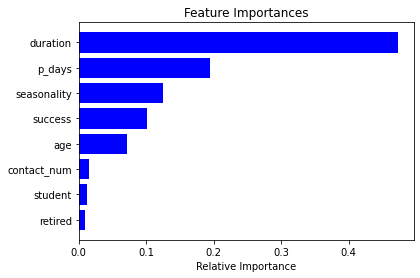

In [100]:
features = X_train.columns.tolist()
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [101]:
print("RF train accuracy: %0.3f" % rf_clf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf_clf.score(X_test, y_test))

RF train accuracy: 0.909
RF test accuracy: 0.903


In [102]:
from sklearn.metrics import roc_auc_score
print('RF train AUC : %s' % roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]))
print('RF test AUC: %s' % roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

RF train AUC : 0.9069435903250207
RF test AUC: 0.8990467464560981
